In [2]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np



import warnings
# remove all warnings
warnings.filterwarnings("ignore")




# Load the dataset
df1 = pd.read_csv('dataset.csv')
df = df1.drop(['customer_id'], axis=1)


# Handling missing values
#imputer = SimpleImputer(strategy='median')
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# replace % and ? with null in the country column 
df['country'].replace(['?', '%'], pd.NA, inplace=True)

# Drop rows with missing
print(df.isna().sum())
df.dropna(inplace=True)




#one-hot encoding 
categorical_columns = ['country', 'gender']
df = pd.get_dummies(df, columns=categorical_columns)

display(df)

# Separate features and target  
X = df.drop('churn (Churn Status)', axis=1) 
y = df['churn (Churn Status)'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



credit_score                                                           0
country                                                               17
gender                                                                 0
age                                                                    0
tenure (From how many years he/she is having bank acc in ABC Bank)     0
Account balance                                                        2
products_number (Number of Product from bank)                          0
credit_card (Is this customer have credit card ?)                      0
active_member (Is he/she is active Member of bank ?)                   0
estimated_salary                                                       3
churn (Churn Status)                                                   0
dtype: int64


,credit_score,age,tenure (From how many years he/she is having bank acc in ABC Bank),Account balance,products_number (Number of Product from bank),credit_card (Is this customer have credit card ?),active_member (Is he/she is active Member of bank ?),estimated_salary,churn (Churn Status),country_France,country_Germany,country_Spain,gender_Female,gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,764,38,4,113607.47,1,1,0,91094.46,0,0,0,1,0,1
10002,678,41,2,148088.11,1,1,0,14083.12,0,1,0,0,0,1
10003,751,48,4,0.00,1,0,1,30165.06,1,1,0,0,1,0
10004,670,33,8,126679.69,1,1,1,39451.09,0,1,0,0,0,1


## complement NaIVe BAyes

In [20]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV


param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Various values for alpha
    'fit_prior': [True, False],      # Whether to learn class prior probabilities from the data
    'class_prior': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7]]  # Prior probabilities for each class
}


model = ComplementNB()


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

# Evaluate the best model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Best Parameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}

Confusion Matrix:
[[903 670]
 [197 227]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.57      0.68      1573
           1       0.25      0.54      0.34       424

    accuracy                           0.57      1997
   macro avg       0.54      0.55      0.51      1997
weighted avg       0.70      0.57      0.61      1997


Accuracy Score: 0.5658487731597396


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = ComplementNB()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[903 670]
 [197 227]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.57      0.68      1573
           1       0.25      0.54      0.34       424

    accuracy                           0.57      1997
   macro avg       0.54      0.55      0.51      1997
weighted avg       0.70      0.57      0.61      1997


Accuracy Score: 0.5658487731597396


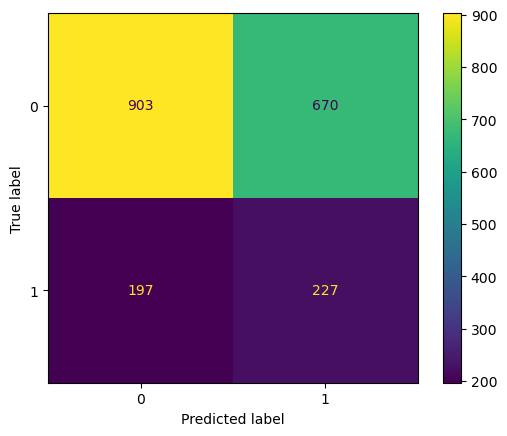


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.57      0.68      1573
           1       0.25      0.54      0.34       424

    accuracy                           0.57      1997
   macro avg       0.54      0.55      0.51      1997
weighted avg       0.70      0.57      0.61      1997



In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix)
cm_display.plot()
plt.show()

# Classification report
classification = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(classification)


## over sampling

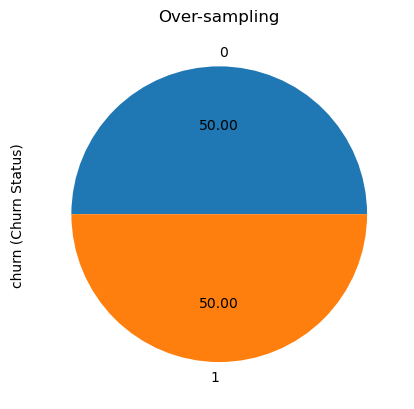

In [34]:



from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

smote =SMOTE()
X_res_o, y_res_o =smote.fit_resample(X_train, y_train)

# ros = RandomOverSampler(sampling_strategy=1) # Float
#ros = RandomOverSampler(sampling_strategy="not majority") # String
#X_res_o, y_res_o = ros.fit_resample(X_train_scaled, y_train)

ax = y_res_o.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")


     

In [35]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#  parameter grid to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0,3,4,5,6],  # Various values for alpha
    'fit_prior': [True, False],      # Whether to learn class prior probabilities from the data
    'class_prior': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7]]  # Prior probabilities for each class
}

#  Complement Naive Bayes classifier
model = ComplementNB()


grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='recall')
grid_search.fit(X_res_o, y_res_o)


print("Best Parameters:", grid_search.best_params_)

#  the best model
best_model = grid_search.best_estimator_

# Make predictions 
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Best Parameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}

Confusion Matrix:
[[903 670]
 [199 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.57      0.68      1573
           1       0.25      0.53      0.34       424

    accuracy                           0.56      1997
   macro avg       0.54      0.55      0.51      1997
weighted avg       0.70      0.56      0.60      1997


Accuracy Score: 0.5648472709063596


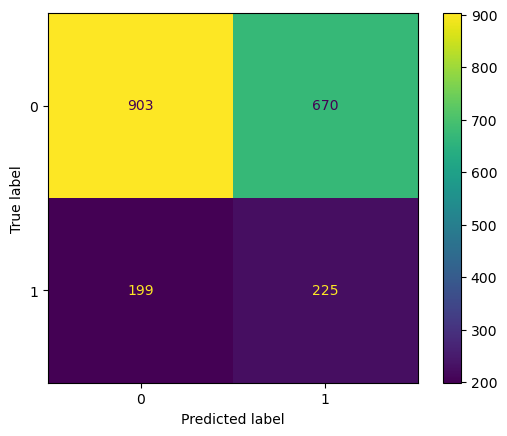


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.57      0.68      1573
           1       0.25      0.53      0.34       424

    accuracy                           0.56      1997
   macro avg       0.54      0.55      0.51      1997
weighted avg       0.70      0.56      0.60      1997



In [36]:
con_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix)
cm_display.plot()
plt.show()

# Classification report
classification = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(classification)

###  under sampling

In [4]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) 
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)

In [7]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Define the parameter grid 
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0,3,4,5,6],  
    'fit_prior': [True, False],      
    'class_prior': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7]] 
}


model = ComplementNB()


grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='recall')
grid_search.fit(X_res, y_res)


print("Best Parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Best Parameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}

Confusion Matrix:
[[900 673]
 [196 228]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.57      0.67      1573
           1       0.25      0.54      0.34       424

    accuracy                           0.56      1997
   macro avg       0.54      0.55      0.51      1997
weighted avg       0.70      0.56      0.60      1997


Accuracy Score: 0.5648472709063596


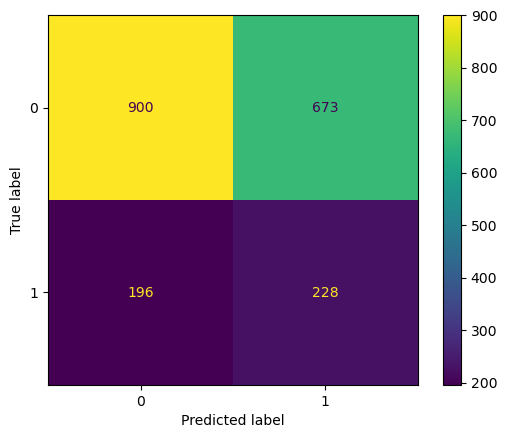


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.57      0.67      1573
           1       0.25      0.54      0.34       424

    accuracy                           0.56      1997
   macro avg       0.54      0.55      0.51      1997
weighted avg       0.70      0.56      0.60      1997



In [8]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix)
cm_display.plot()
plt.show()

# Classification report
classification = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(classification)